In [1]:
import pandas as pd
from pandas import Series, DataFrame;
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = 30

In [2]:
class HZ:
    def __init__(self, var, n):
        self.var = var
        self.n = n
        
    def DFp(self):
        df = []
        i = 0
        for num in HZ.Hopt(self):
            df.append((i * [0] + [num * n for n in HZ.Sm(self)] + (14 - i) * [0]))
            i = i + 1
        return df
    
    def SUMp(self):
        df_sum = []
        df_sump = zip(*HZ.DFp(self))
        for row in df_sump:
            df_sum.append(sum(row))
        return df_sum
    
    def m(self):
        m0 = []
        m = [1,3,7,15,14,13,10,5,11,6,12,9,2,4,8]
        m = m[m.index(self.var):] + m[:m.index(self.var)]
        m = [bin(n) for n in m]
        for num in m:
            if len(num) == 6:
                m0.append(1)
            else:
                m0.append(0)
        if self.n == 0:
            return m0
        else:
            mr = []
            mn = m0[-self.n:] + m0[:-self.n]
            i = 0
            while i < 15:
                if mn[i] == m0[i]:
                    mr.append(0)
                    i = i + 1
                else:
                    mr.append(1)
                    i = i + 1
            return mr    
    
    def Sm(self):
        Sm = []
        mm = HZ.m(self)
        for num in mm:
            if num == 0:
                Sm.append(-1)
            else:
                Sm.append(1)
        return Sm

    def Hopt(self):
        hopt = []
        m0 = []
        m = [1,3,7,15,14,13,10,5,11,6,12,9,2,4,8]
        m = m[m.index(self.var):] + m[:m.index(self.var)]
        m = [bin(n) for n in m]
        for num in m:
            if len(num) == 6:
                m0.append(1)
            else:
                m0.append(0)
        for num in m0:
            if num == 0:
                hopt.append(-1)
            else:
                hopt.append(1)
        return hopt[::-1]
    
    def PLOT(self):
        plt.plot(range(29), HZ.SUMp(self))
    
    def DF(self):
        df = HZ.DFp(self)
        df.append(HZ.SUMp(self))
        return pd.DataFrame(df, index = HZ.Hopt(self) + [""], columns = 29 * [""])
    
    def REZ(self):
        print ("m" + str(self.n) + ": " + str(HZ.m(self)))
        print ("Sm" + str(self.n) + ": " + str(HZ.Sm(self)))
        print ("Hopt: " + str(HZ.Hopt(self)))
        plt.plot(range(29), HZ.SUMp(self))
        df = HZ.DFp(self)
        df.append(HZ.SUMp(self))
        return pd.DataFrame(df, index = HZ.Hopt(self) + [""], columns = 29 * [""])

m0: [0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1]
Sm0: [-1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1]
Hopt: [1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,0,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,0,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,0,0,0,0,0


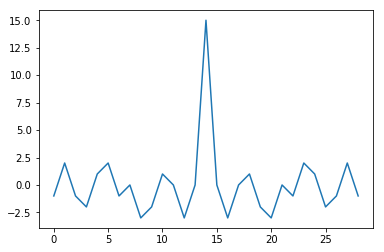

In [3]:
HZ0 = HZ(6,0)
HZ0.REZ()

m1: [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1]
Sm1: [1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1]
Hopt: [1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,-1,-1,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,0,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,-1,-1,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,-1,-1,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,0,-1,-1,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,0,0,0,0,0


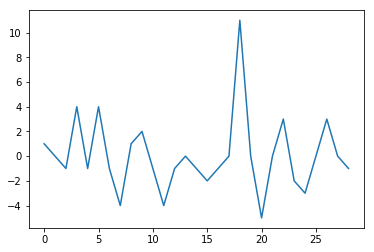

In [4]:
HZ1 = HZ(6,1)
HZ1.REZ()

m2: [0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0]
Sm2: [-1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1]
Hopt: [1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,0,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,0,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,0,0,0,0,0


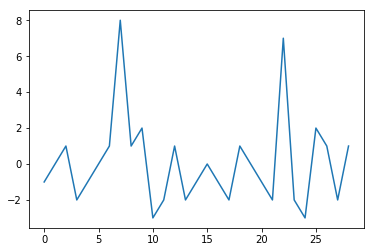

In [5]:
HZ2 = HZ(6,2)
HZ2.REZ()

m3: [1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0]
Sm3: [1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1]
Hopt: [1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,0,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,0,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,0,0,0,0,0


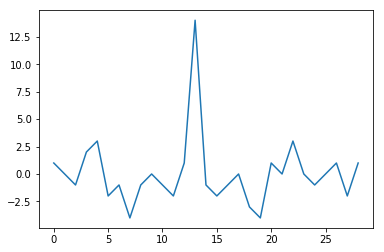

In [6]:
HZ3 = HZ(6,3)
HZ3.REZ()

m4: [1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0]
Sm4: [1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1]
Hopt: [1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,0,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,0,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,0,0,0,0,0


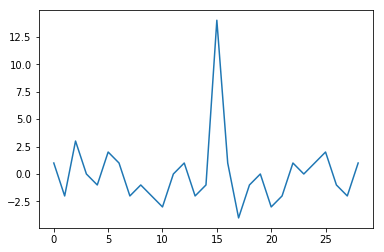

In [7]:
HZ4 = HZ(6,4)
HZ4.REZ()

m5: [1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0]
Sm5: [1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1]
Hopt: [1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,0,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,0,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,0,0,0,0,0


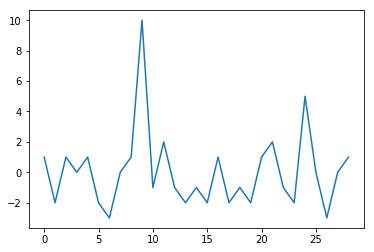

In [8]:
HZ5 = HZ(6,5)
HZ5.REZ()

m6: [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1]
Sm6: [1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1]
Hopt: [1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,0,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,0,-1,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,0,0,0,0,0


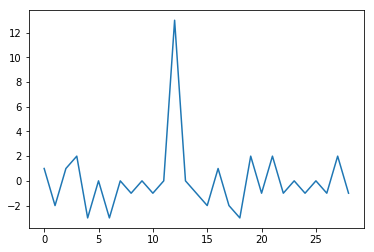

In [9]:
HZ6 = HZ(6,6)
HZ6.REZ()

m7: [0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1]
Sm7: [-1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1]
Hopt: [1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,0,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,0,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,0,0,0,0,0


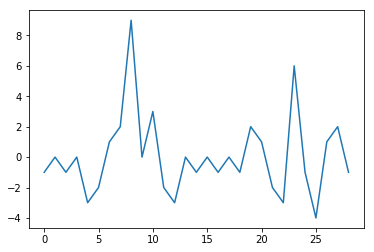

In [10]:
HZ7 = HZ(6,7)
HZ7.REZ()

m8: [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]
Sm8: [-1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1]
Hopt: [1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,0,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,0,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,-1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,1,0,0,0,0,0


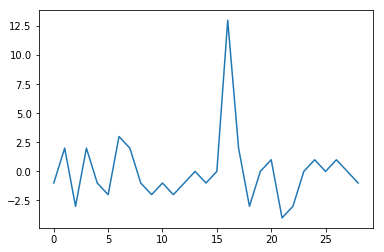

In [11]:
HZ8 = HZ(6,8)
HZ8.REZ()

m9: [0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0]
Sm9: [-1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1]
Hopt: [1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,0,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1,1,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1,1,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,-1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,0,0,0,0,0


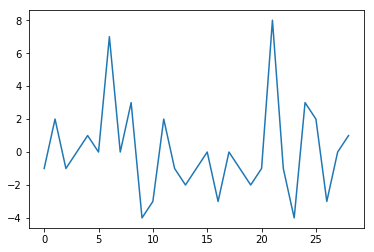

In [12]:
HZ9 = HZ(6,9)
HZ9.REZ()

m10: [1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1]
Sm10: [1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1]
Hopt: [1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,0,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,0,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,0,0,0,0,0


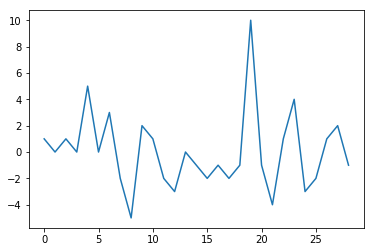

In [13]:
HZ10 = HZ(6,10)
HZ10.REZ()

m11: [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1]
Sm11: [-1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1]
Hopt: [1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,0,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,0,1,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,-1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,0,0,0,0,0


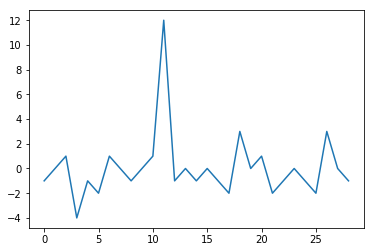

In [14]:
HZ11 = HZ(6,11)
HZ11.REZ()

m12: [0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0]
Sm12: [-1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1]
Hopt: [1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,0,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,0,1,-1,1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,-1,1,-1,-1,-1,1,1,1,1,-1,1,-1,1,1,-1,0,0,0,0,0


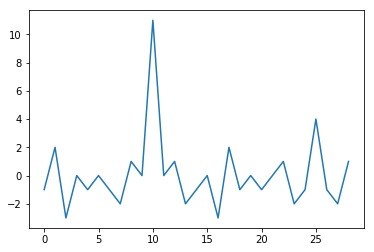

In [15]:
HZ12 = HZ(6,12)
HZ12.REZ()

m13: [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0]
Sm13: [1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1]
Hopt: [1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,0,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1,1,1,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1,1,1,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,0,-1,-1,-1,-1,1,-1,1,-1,-1,1,1,-1,1,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,0,0,0,0,0


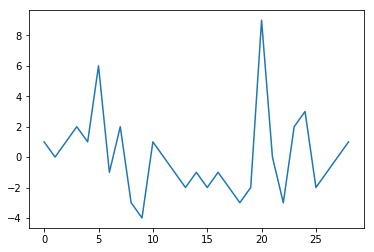

In [16]:
HZ13 = HZ(6,13)
HZ13.REZ()

m14: [1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1]
Sm14: [1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1]
Hopt: [1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-1,0,-1,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,0,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,-1,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,0,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,-1,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,0,0,0,0,0,0,0
-1,0,0,0,0,0,0,0,0,-1,1,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,-1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,-1,1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,1,0,0,0,0,0


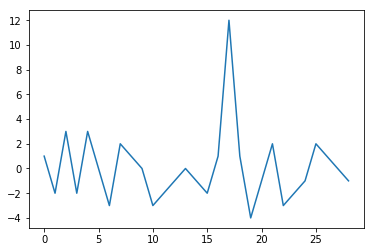

In [17]:
HZ14 = HZ(6,14)
HZ14.REZ()